In [8]:


%matplotlib inline
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
import pandas as pd
from celluloid import Camera
#----------------------------------------------------------------------
##  BLOCK OF FUNCTIONS USED IN THE MAIN CODE
#----------------------------------------------------------------------
def initialstate(N):   
    ''' generates a random spin configuration for initial condition'''
    state = np.random.choice([-1, 1], size=(N,N), p=[50/100, 50/100])
    return state


def update(config,q,a,b):
    N=len(config)   
    #if every spin as the same direction the program enters in the "if"
    if (config[a,b]==config[(a+1)%N,b] and config[a,b]==config[a,(b+1)%N] and config[a,b]==config[(a+1)%N,(b+1)%N]):
        
        #every neighbour take a random spin with probability q
        if(np.random.rand()<q): config[(a-1),b]=np.random.randint(0,2)*2-1
        else:config[(a-1),b]=config[a,b]
            
        if(np.random.rand()<q): config[(a-1),(b+1)%N]=np.random.randint(0,2)*2-1
        else:config[(a-1),(b+1)%N]=config[a,b]
            
        if(np.random.rand()<q): config[(a),(b-1)]=np.random.randint(0,2)*2-1
        else:config[a,(b-1)]=config[a,b]
       
        if(np.random.rand()<q): config[(a),(b+2)%N]=np.random.randint(0,2)*2-1
        else: config[a,(b+2)%N]=config[a,b]
        
        if(np.random.rand()<q): config[(a+1)%N,(b-1)]=np.random.randint(0,2)*2-1
        else: config[(a+1)%N,(b-1)]=config[a,b]
            
        if(np.random.rand()<q): config[(a+1)%N,(b+2)%N]=np.random.randint(0,2)*2-1
        else:config[(a+1)%N,(b+2)%N]=config[a,b]
            
        if(np.random.rand()<q): config[(a+2)%N,b]=np.random.randint(0,2)*2-1
        else: config[(a+2)%N,b]=config[a,b]
            
        if(np.random.rand()<q): config[(a+2)%N,(b+1)%N]=np.random.randint(0,2)*2-1
        else: config[(a+2)%N,(b+1)%N]=config[a,b]
    return config

# this function just calls update for a random plaquette of spins
def mcmove(config,q):
    N=len(config)
    for l in range(N):
        for k in range(N):    
            a = np.random.randint(0, N)
            b = np.random.randint(0, N)           
            update(config,q,a,b)          
    return config


def calcMag(config):
    '''Magnetization of a given configuration'''
    mag = np.sum(config)
    return mag

#number of repetition of the simulation
nt  = 1
#  size of the lattice, N x N
N=40
#  number of MC sweeps for calculation
mcSteps = 400
#probability of non conformism
q=0.001

# divide by number of samples, and by system size to get intensive values
mags=[]

#----------------------------------------------------------------------
#  MAIN PART OF THE CODE
#----------------------------------------------------------------------


import matplotlib

#a color map i made straight from the 90s
"""
pink = np.array([248/256, 24/256, 148/256, 1])
lightb = np.array([51/256, 255/256, 148/256, 1])
a=matplotlib.colors.ListedColormap([pink,lightb])
"""
# uncomment to obtain a gif of the sumulation

"""
fig= plt.figure();
sp =  fig.add_subplot(1, 1,1 )  
camera = Camera(fig)
X, Y = np.meshgrid(range(N), range(N))
"""

means=pd.DataFrame()
stop=[]
mags=[]
for tt in range(nt):
    M1 = 0
    config = initialstate(N)    
    i=0
 #uncomment the while and stop.append(i) to see when the sistem hit the absorption time (only with q =0)
    #while(int(abs(calcMag(config)))/(N*N)!=1):  
    while(i<=mcSteps):
        mcmove(config,q) 
        i+=1
        mags.append(calcMag(config)/(N*N))  

    #stop.append(i)


        
    """
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)      
        plt.pcolormesh(X, Y, config, cmap=a)
       
    
        plt.axis('tight')    
        ttl = plt.text(N/2, N+1, i, horizontalalignment='center', verticalalignment='top')
        
        camera.snap()
        
    animation = camera.animate()
    animation.save('./0001q.gif', writer = 'imagemagick')
"""
#means.to_csv('./means_steady_long.csv')
#plt.plot(mags)

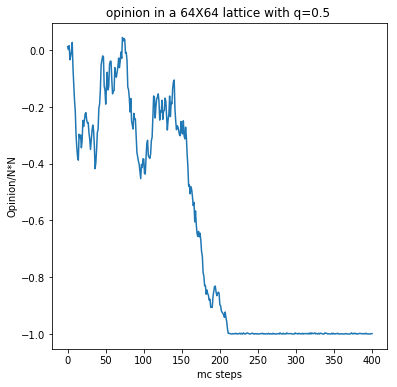

In [9]:
#plot of the magnetization (mean opinion) at every mc step
plt.figure(figsize=(6,10))
plt.xlabel('mc steps')
plt.ylabel('Opinion/N*N')

plt.title('opinion in a 64X64 lattice with q=0.5 ')
plt.plot(mags)

#plt.savefig('05q400sweep.png')

In [ ]:
#i used the results to plot the absorption times for systems with the same size and q=0, and i obtained a levy distribution
"""
import levy
unique, count = np.unique(stop, return_counts=True)
print(np.asarray((unique, count)))
count=count/1000
plt.plot(unique,count,'*')
#plt.hist(stop)
levy.fit_levy(stop)
x=np.linspace(1,280,200)
a= levy.levy(x, 1.06, 1, mu=26.31, sigma=10.67, cdf=False)
plt.plot(x,a)
plt.savefig('levy_time_distribution.png')"""